# Implementación sencilla de Red Neuronal con Sklearn

Las **redes neuronales** son modelos creados al ordenar operaciones matemáticas siguiendo una determinada estructura.

Diego Lizarazo


# Recolección de información

Para este ejercicio vamos a implementar un conjunto de información sencillo y fácil de entender denominado **Iris**.

El Iris Dataset contiene cuatro características (largo y ancho de sépalos y pétalos) de 50 muestras de tres especies de Iris (Iris setosa, Iris virginica e Iris versicolor).

Se puede encontrar facilmente por la web pero para facilidad lo vamos a insertar como una url que contiene un archivo .csv.

No obstante, utilizaremos conceptos básicos de la librería `Pandas` y `NumpY` para la manipulación de la información

In [232]:
# Importación de la librería pandas con su acrónimo
import pandas as pd
import numpy as np

In [233]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [234]:
# Carga de datos y visualuzación del header
df = pd.read_csv("/content/drive/MyDrive/2022-3/IA2/ia2/tareas/redes neuronales/TICTAC.csv")
df.head()

,1,2,3,4,5,6,7,8,9,resultado
0,x,x,x,x,o,o,x,o,o,positive
1,x,x,x,x,o,o,o,x,o,positive
2,x,x,x,x,o,o,o,o,x,positive
3,x,x,x,x,o,o,o,b,b,positive
4,x,x,x,x,o,o,b,o,b,positive


In [235]:
# Información básica del conjunto (comprobar que no hay datos existentes y tipo de variables)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958 entries, 0 to 957
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   1          958 non-null    object
 1   2          958 non-null    object
 2   3          958 non-null    object
 3   4          958 non-null    object
 4   5          958 non-null    object
 5   6          958 non-null    object
 6   7          958 non-null    object
 7   8          958 non-null    object
 8   9          958 non-null    object
 9   resultado  958 non-null    object
dtypes: object(10)
memory usage: 75.0+ KB


# Conjuntos de entrenamiento y testeo

Es indispensable dividir nuestro conjunto de información para que la Red Neuronal pueda aprender y reproducir. Esto normalmente se realiza con una proporción de 70%-30% ó 80%-20% (entrenamiento - testeo).

La librería función `train_test_split` de `sklearn.model_selection` nos permitirá dividir y estratificarlo mediante la variable objetivo para una proporción entre estas.

Primero separamos la información, es decir, extraer las etiquetas en un subconjunto diferente, lo denominaremos **Y**.
El conjunto de atributos lo denominaremos **x**

In [236]:
# Se selecciona solamente la columna objetivo
y = df['resultado']
y

0      positive
1      positive
2      positive
3      positive
4      positive
         ...   
953    negative
954    negative
955    negative
956    negative
957    negative
Name: resultado, Length: 958, dtype: object

In [237]:
df.value_counts('resultado')


resultado
positive    626
negative    332
dtype: int64

In [238]:
# Se selecciona el DataFrame complejo sin la columba objetivo
X = df.drop(['resultado'], axis=1)
X

,1,2,3,4,5,6,7,8,9
0,x,x,x,x,o,o,x,o,o
1,x,x,x,x,o,o,o,x,o
2,x,x,x,x,o,o,o,o,x
3,x,x,x,x,o,o,o,b,b
4,x,x,x,x,o,o,b,o,b
...,...,...,...,...,...,...,...,...,...
953,o,x,x,x,o,o,o,x,x
954,o,x,o,x,x,o,x,o,x
955,o,x,o,x,o,x,x,o,x
956,o,x,o,o,x,x,x,o,x


Realizamos la separación

In [239]:
# Llamado de la librería

from sklearn.model_selection import train_test_split

Convertimos los valores a numerico

In [240]:
x_auxiliar=X.replace({"o": 0, "x": 1, "b": 2})

In [241]:
x_auxiliar

,1,2,3,4,5,6,7,8,9
0,1,1,1,1,0,0,1,0,0
1,1,1,1,1,0,0,0,1,0
2,1,1,1,1,0,0,0,0,1
3,1,1,1,1,0,0,0,2,2
4,1,1,1,1,0,0,2,0,2
...,...,...,...,...,...,...,...,...,...
953,0,1,1,1,0,0,0,1,1
954,0,1,0,1,1,0,1,0,1
955,0,1,0,1,0,1,1,0,1
956,0,1,0,0,1,1,1,0,1


In [242]:
# Conjuntos de entrenamiento y testeo para X y Y respectivamente
X_train, X_test, y_train, y_test = train_test_split(x_auxiliar, y, test_size=0.3, random_state=0, stratify=y)

In [243]:
X_train[:1]

,1,2,3,4,5,6,7,8,9
338,0,1,0,2,1,0,1,1,2


In [244]:
# Comparamos con el DataFrame original
print(f'Cantidad de elementos en el DF original en X: {df.shape[0]}')
print(f'Cantidad de elementos de entrenamiento en X: {X_train.shape[0]}')
print(f'Cantidad de elementos de testeo en X: {X_test.shape[0]}')

Cantidad de elementos en el DF original en X: 958
Cantidad de elementos de entrenamiento en X: 670
Cantidad de elementos de testeo en X: 288


# Modelo de Red Neuronal

Sklearn nos ofrece una utilidad para implementar una Red Neuronal tipo **Clasificador Perceptron Multicapa**.
Este modelo optimiza la función de pérdida de registro utilizando LBFGS o descenso de gradiente estocástico.

Para su implementación, la utilidad `MLPClassifier` de `sklearn.neural_network`.

Las siguientes celdas muestra su implementación en este caso con un manejo de Hiperparámetros sencillos. Si desea amplificarlos puede consultar en: [MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)

In [245]:
# Llamado de librería
from sklearn.neural_network import MLPClassifier

In [246]:
# Declaración de nuestra red neuronal
model_mlp = MLPClassifier(
    hidden_layer_sizes = (60,60,60), # Cantidad de capas ocultas y su respectivo tamaño
    max_iter = 1000 # Cantidad máxima de iteraciones en el modelo
)

In [247]:
# Entrenamiento de nuestro modelo
model_mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(60, 60, 60), max_iter=1000)

# Predicción

Inicialmente podríamos realizar una predicción con los valores de testeo que tenemos, para ello basta con llamar el parámetro `.predict()` y adjutarle estos valores, así:

In [248]:
# Realizamos la predicción de nuestro conjunto de Testeo
y_predict= model_mlp.predict(X_test)
y_predict

array(['negative', 'positive', 'positive', 'positive', 'positive',
       'positive', 'negative', 'positive', 'negative', 'positive',
       'positive', 'positive', 'negative', 'positive', 'positive',
       'positive', 'positive', 'positive', 'negative', 'positive',
       'positive', 'positive', 'positive', 'negative', 'negative',
       'positive', 'positive', 'positive', 'negative', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'negative', 'positive', 'negative', 'negative',
       'negative', 'positive', 'negative', 'positive', 'negative',
       'positive', 'negative', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'negative', 'negative',
       'positive', 'positive', 'negative', 'negative', 'negative',
       'positive', 'positive', 'positive', 'negative', 'positive',
       'positive', 'negative', 'positive', 'negative', 'positive',
       'positive', 'positive', 'negative', 'positive', 'negati

Pero también podemos adjuntarle otros valores desconocidos para usar esta red. Para ello basta con agregar los valores en el mismo orden y que sea la misma cantidad total de atributos. Así:

In [249]:
# Recordemos las columnas de nuestro DataFrame
x_auxiliar.columns.tolist()

['1', '2', '3', '4', '5', '6', '7', '8', '9']

In [250]:
# Creamos un arreglo con nuestra información para que el modelo pueda reconocerlo
new_info = [[0,2,2,1,0,1,2,1,0]]

In [251]:
# Eviamos la anterior información para su predicción (método .predict[array] )
print(model_mlp.predict(new_info))

['negative']


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [252]:
# Creamos un arreglo con nuestra información para que el modelo pueda reconocerlo
new_info = [[1,2,2,0,1,0,2,0,1]]

In [253]:
# Eviamos la anterior información para su predicción (método .predict[array] )
print(model_mlp.predict(new_info))

['positive']


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"


# Evaluación

Existen diversas formas de evaluar el modelo. En este caso evaluaremos el score, la matriz de confusión y la gráfica de pérdida

Primero, el método `.score()` nos permite obtener la exactitud media. Es inispensable enviarle el conjunto de testeo, tanto de X como de y

In [254]:
model_mlp.score(X_test, y_test)

0.9479166666666666

Por otra parte, la matriz de confusión es una herramienta que nos permitirá permite visualizar el desempeño de este algoritmo.

Las utilidades `classification_report` y `confusion_matrix` del paquete `sklearn.metrics` nos permitirá evaluar este modelo mediante nuestro resultado de predicciones y el conjunto de información para testeo.

In [255]:
# Importación de la libreria
from sklearn.metrics import classification_report, confusion_matrix

In [256]:
# Visualizacmos la matriz de confusión
print(confusion_matrix( y_test, y_predict))

[[ 94   6]
 [  9 179]]


In [257]:
# Visualización del reporte de clasificación
print(classification_report( y_test, y_predict))

              precision    recall  f1-score   support

    negative       0.91      0.94      0.93       100
    positive       0.97      0.95      0.96       188

    accuracy                           0.95       288
   macro avg       0.94      0.95      0.94       288
weighted avg       0.95      0.95      0.95       288



Para finalizar podríamos observar la gráfica de pérdida. La dea es obtener una buena curva que sea lo más cercana a 0.

Para interpretar esta y otras curvas puede visitar: [Interpreta las curvas de pérdida](https://developers.google.com/machine-learning/testing-debugging/metrics/interpretic)

In [258]:
# Guardamos la información de la curva de pérdida que nos ofrece el modelo
loss_curve = model_mlp.loss_curve_

In [259]:
# Observamos el tamaño, coincide con nuestro número de iteraciones
len(loss_curve)

169

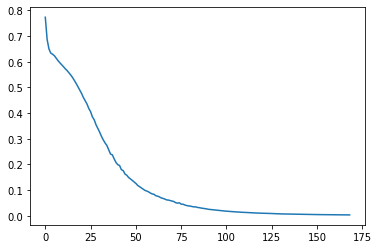

In [260]:
# Visualizamos sencillamente
import matplotlib.pyplot as plt

plt.plot(loss_curve)
plt.show()

No menos importante, el método `.get_params()` nos permitirá ver todos aquellos los hiperparámetros con los que funciona nuestra red neuronal.

In [261]:
model_mlp.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (60, 60, 60),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 1000,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}